In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


from sklearn.metrics import accuracy_score , precision_score , recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers , losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

#### Load your dataset

In [37]:
(x_train, _) , (x_test, _) = mnist.load_data()

In [38]:
x_train , x_val = x_train[:-10000], x_train[-10000 :]

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.


print(x_train.shape)
print(x_test.shape)
print(x_val.shape)




(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


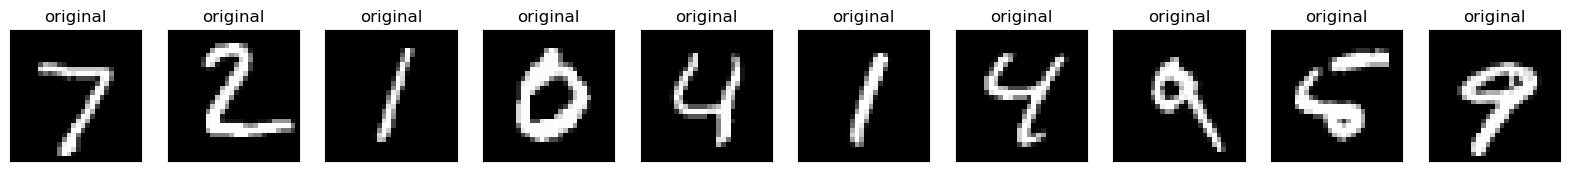

In [39]:
n = 10 
plt.figure(figsize=(20,4))
for i in range(n):
    #display origin
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [40]:
latent_dim = 64

class Autoencoder(Model):
    def __init__(self,latent_dim):
        super(Autoencoder , self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim , activation = 'relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation = 'sigmoid'),
            layers.Reshape((28,28))
        ])
    def call(self , x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)
        
         

### Define Auto Encoder Class

In [42]:
autoencoder.compile(optimizer = 'adam' , loss=losses.MeanSquaredError())

In [43]:
autoencoder.fit(x_train , x_train,
              epochs = 10,
              shuffle=True,
              validation_data=(x_val , x_val))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0477 - val_loss: 0.0112
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - loss: 0.0093 - val_loss: 0.0062
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - loss: 0.0041 - val_loss: 0.0042
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0041 - val_loss: 0.0041


In [52]:
print(autoencoder.encoder.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        50,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,240 (196.25 KB)

 Trainable params: 50,240 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [54]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

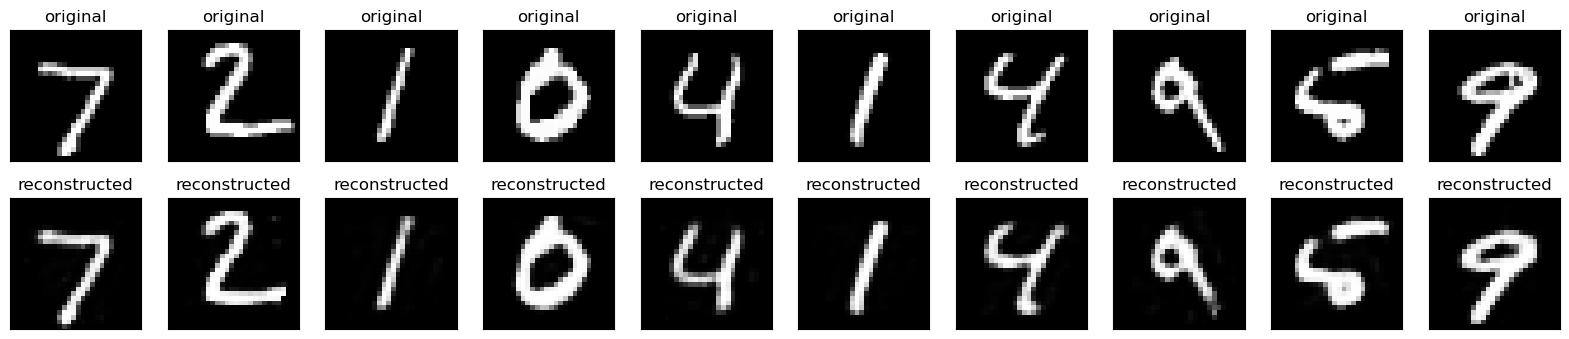

In [58]:
n = 10 
plt.figure(figsize=(20,4))
for i in range(n):
    
    #display origin
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
     #reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()